Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Progress: 1/48 combinations tested
Progress: 2/48 combinations tested
Progress: 3/48 combinations tested
Progress: 4/48 combinations tested
Progress: 5/48 combinations tested
Progress: 6/48 combinations tested
Progress: 7/48 combinations tested
Progress: 8/48 combinations tested
Progress: 9/48 combinations tested
Progress: 10/48 combinations tested
Progress: 11/48 combinations tested
Progress: 12/48 combinations tested
Progress: 13/48 combinations tested
Progress: 14/48 combinations tested
Progress: 15/48 combinations tested
Progress: 16/48 combinations tested
Progress: 17/48 combinations tested
Progress: 18/48 combinations tested
Progress: 19/48 combinations tested
Progress: 20/48 combinations tested
Progress: 21/48 combinations tested
Progress: 22/48 combinations tested
Progress: 23/48 combinations tested
Progress: 24/48 combinations tested
Progress: 25/48 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Progress: 35/48 combinations tested


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Progress: 36/48 combinations tested
Progress: 37/48 combinations tested
Progress: 38/48 combinations tested
Progress: 39/48 combinations tested
Progress: 40/48 combinations tested
Progress: 41/48 combinations tested
Progress: 42/48 combinations tested


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Progress: 43/48 combinations tested


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Progress: 44/48 combinations tested
Progress: 45/48 combinations tested
Progress: 46/48 combinations tested


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Progress: 47/48 combinations tested


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Progress: 48/48 combinations tested
Hyperparameter tuning complete! Results saved.


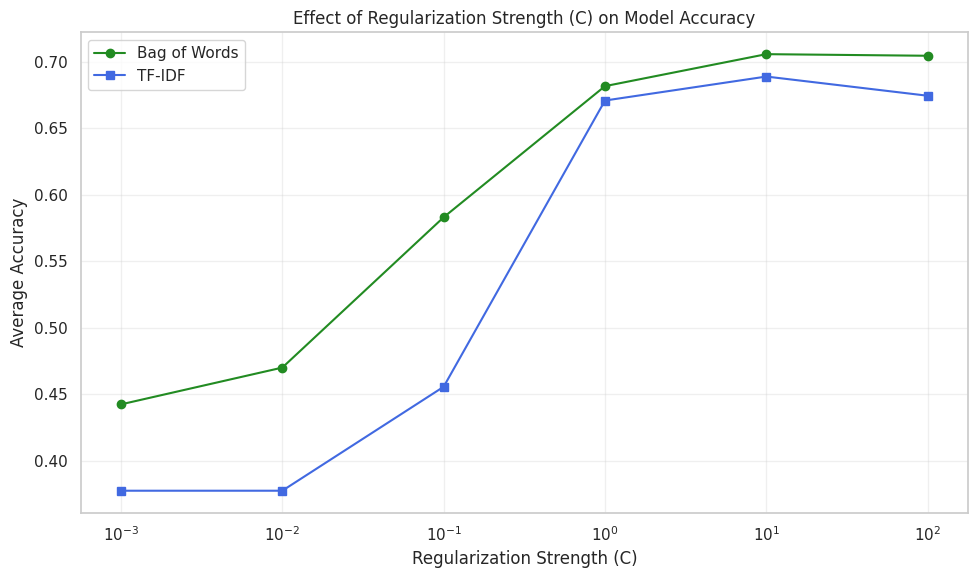

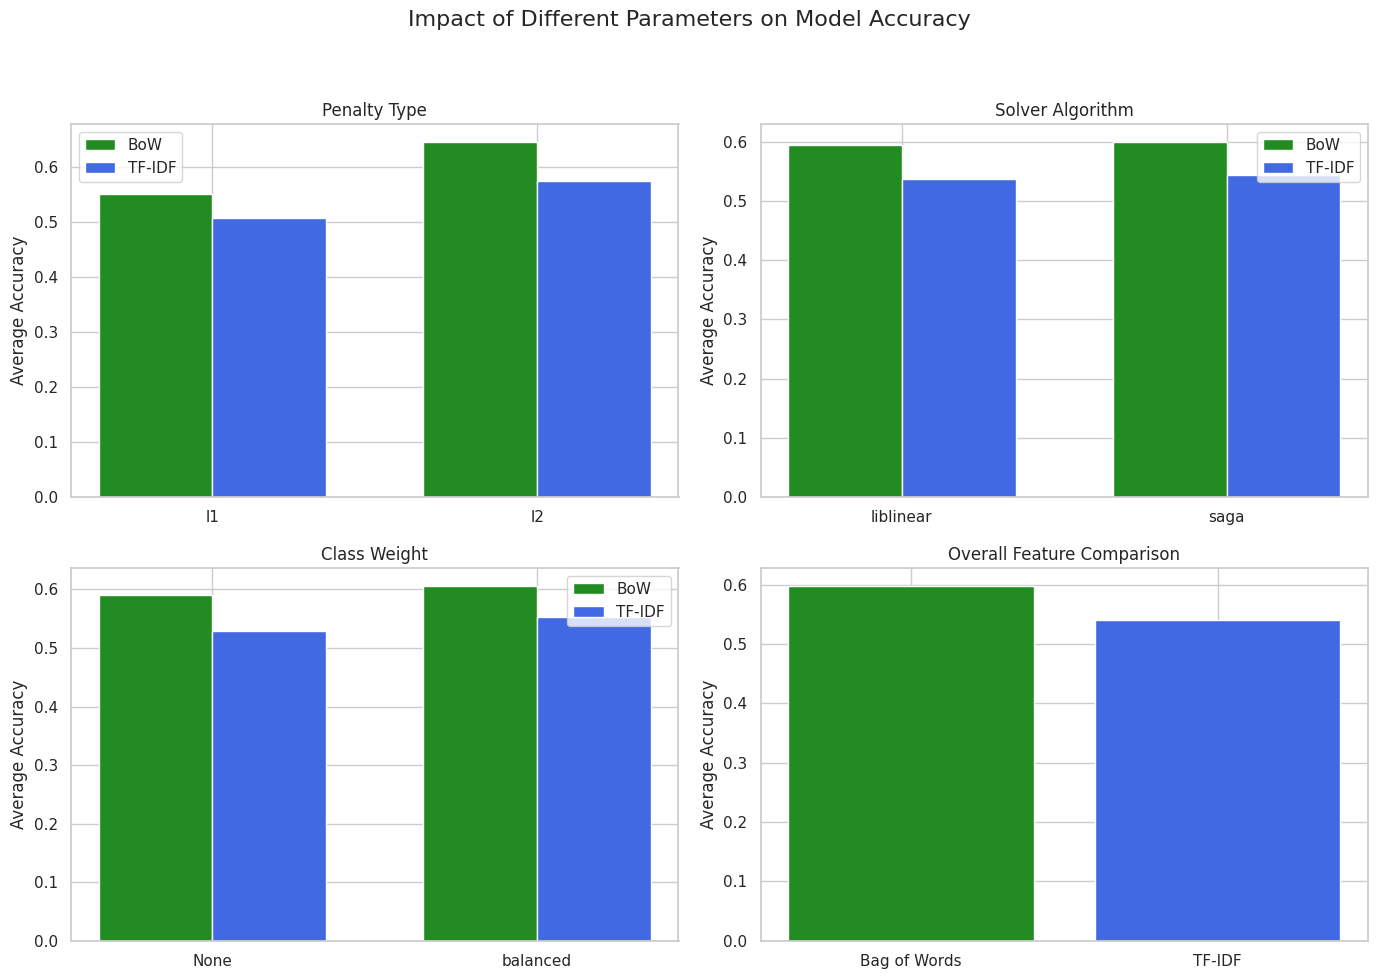

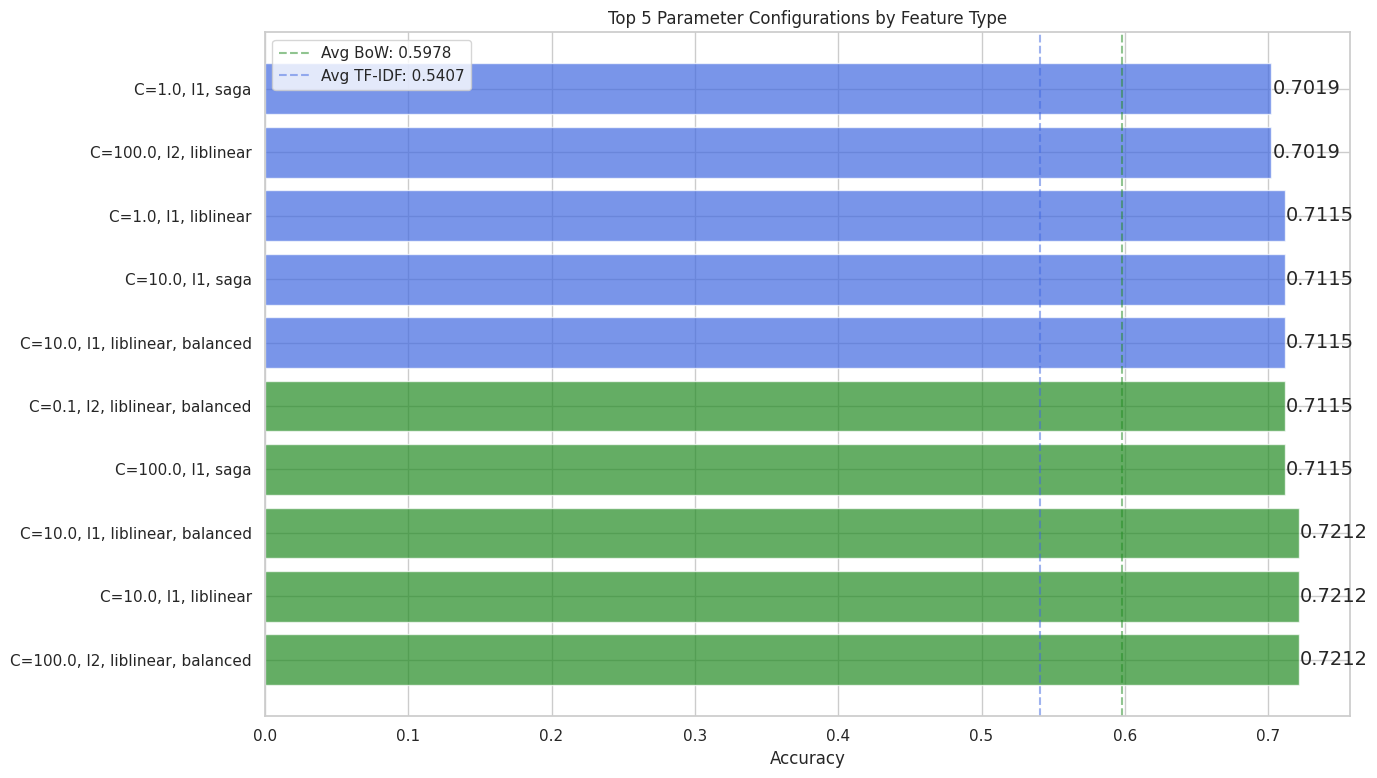


Best BoW Model Configuration:
C=10.0, penalty=l1, solver=liblinear, class_weight=None
Accuracy: 0.7212

Best TF-IDF Model Configuration:
C=1.0, penalty=l1, solver=liblinear, class_weight=None
Accuracy: 0.7115


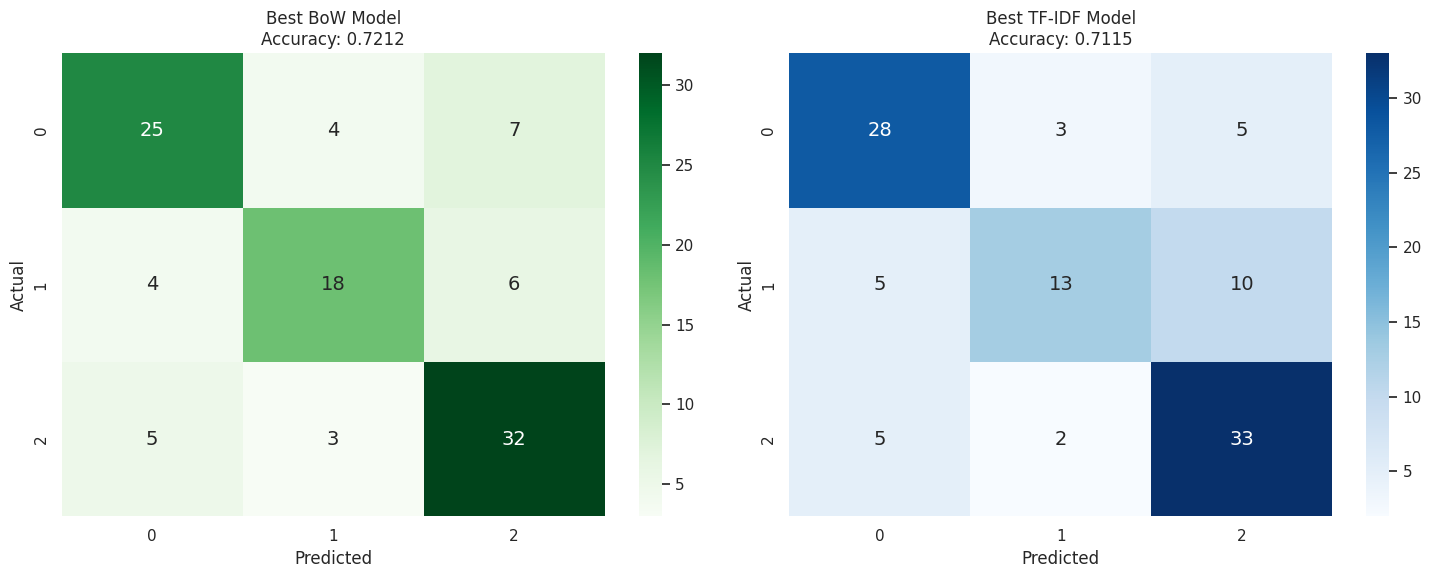


Classification Report for Best BoW Model:
              precision    recall  f1-score   support

           0       0.74      0.69      0.71        36
           1       0.72      0.64      0.68        28
           2       0.71      0.80      0.75        40

    accuracy                           0.72       104
   macro avg       0.72      0.71      0.72       104
weighted avg       0.72      0.72      0.72       104


Classification Report for Best TF-IDF Model:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        36
           1       0.72      0.46      0.57        28
           2       0.69      0.82      0.75        40

    accuracy                           0.71       104
   macro avg       0.72      0.69      0.69       104
weighted avg       0.71      0.71      0.70       104

All visualizations have been saved to /content/drive/MyDrive/hyperparam_results


In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from scipy import sparse
import itertools
import joblib
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Paths
pca_dir = '/content/drive/MyDrive/pca_data'
label_dir = '/content/drive/MyDrive/split_data'
results_dir = '/content/drive/MyDrive/hyperparam_results'
os.makedirs(results_dir, exist_ok=True)


# Load data
X_tfidf_train = np.load(f"{pca_dir}/X_tfidf_train_reduced.npy")
X_tfidf_test = np.load(f"{pca_dir}/X_tfidf_test_reduced.npy")
X_bow_train = np.load(f"{pca_dir}/X_bow_train_reduced.npy")
X_bow_test = np.load(f"{pca_dir}/X_bow_test_reduced.npy")

# Load labels
y_tfidf_train = np.load(f"{label_dir}/y_tfidf_train.npy")
y_tfidf_test = np.load(f"{label_dir}/y_tfidf_test.npy")
y_bow_train = np.load(f"{label_dir}/y_bow_train.npy")
y_bow_test = np.load(f"{label_dir}/y_bow_test.npy")

# Set up hyperparameter grid
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
penalties = ['l1', 'l2']
solvers = ['liblinear', 'saga']
class_weights = [None, 'balanced']

# Dictionary to store results
results = []

# Hyperparameter tuning with progress tracking
total_combinations = len(Cs) * len(penalties) * len(solvers) * len(class_weights)
completed = 0

for C, penalty, solver, class_weight in itertools.product(Cs, penalties, solvers, class_weights):
    # Skip invalid combinations
    if penalty == 'l1' and solver not in ['liblinear', 'saga']:
        continue

    try:
        # Create the model with current parameters
        clf = LogisticRegression(
            C=C,
            penalty=penalty,
            solver=solver,
            class_weight=class_weight,
            max_iter=1000,
            random_state=42
        )

        # Train and evaluate on BoW
        clf.fit(X_bow_train, y_bow_train)
        y_pred_bow = clf.predict(X_bow_test)
        acc_bow = accuracy_score(y_bow_test, y_pred_bow)

        # Train and evaluate on TF-IDF
        clf.fit(X_tfidf_train, y_tfidf_train)
        y_pred_tfidf = clf.predict(X_tfidf_test)
        acc_tfidf = accuracy_score(y_tfidf_test, y_pred_tfidf)

        # Store results
        results.append({
            'C': C,
            'penalty': penalty,
            'solver': solver,
            'class_weight': str(class_weight),
            'accuracy_bow': acc_bow,
            'accuracy_tfidf': acc_tfidf
        })

        completed += 1
        print(f"Progress: {completed}/{total_combinations} combinations tested")

    except Exception as e:
        print(f"Error with C={C}, penalty={penalty}, solver={solver}, class_weight={class_weight}: {e}")
        continue

# Convert to DataFrame and save results
results_df = pd.DataFrame(results)
results_df.to_csv(f'{results_dir}/logistic_regression_tuning_results.csv', index=False)
print("Hyperparameter tuning complete! Results saved.")

# Set plot style
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 14})

# ------------ VISUALIZATION 1: C Parameter Influence ------------
plt.figure(figsize=(10, 6))
C_performance = results_df.groupby('C').agg({
    'accuracy_bow': 'mean',
    'accuracy_tfidf': 'mean'
}).reset_index()

plt.plot(C_performance['C'], C_performance['accuracy_bow'], 'o-', color='forestgreen', label='Bag of Words')
plt.plot(C_performance['C'], C_performance['accuracy_tfidf'], 's-', color='royalblue', label='TF-IDF')
plt.xscale('log')
plt.title('Effect of Regularization Strength (C) on Model Accuracy')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Average Accuracy')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig(f'{results_dir}/C_parameter_impact.png', dpi=300, bbox_inches='tight')
plt.show()

# ------------ VISUALIZATION 2: Model Parameter Comparison ------------
plt.figure(figsize=(14, 10))

# Create subplots
plt.subplot(2, 2, 1)
penalty_data = results_df.groupby('penalty').agg({
    'accuracy_bow': 'mean',
    'accuracy_tfidf': 'mean'
}).reset_index()
x = range(len(penalty_data))
width = 0.35
plt.bar([i - width/2 for i in x], penalty_data['accuracy_bow'], width, label='BoW', color='forestgreen')
plt.bar([i + width/2 for i in x], penalty_data['accuracy_tfidf'], width, label='TF-IDF', color='royalblue')
plt.xticks(x, penalty_data['penalty'])
plt.title('Penalty Type')
plt.ylabel('Average Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
solver_data = results_df.groupby('solver').agg({
    'accuracy_bow': 'mean',
    'accuracy_tfidf': 'mean'
}).reset_index()
x = range(len(solver_data))
plt.bar([i - width/2 for i in x], solver_data['accuracy_bow'], width, label='BoW', color='forestgreen')
plt.bar([i + width/2 for i in x], solver_data['accuracy_tfidf'], width, label='TF-IDF', color='royalblue')
plt.xticks(x, solver_data['solver'])
plt.title('Solver Algorithm')
plt.ylabel('Average Accuracy')
plt.legend()

plt.subplot(2, 2, 3)
weight_data = results_df.groupby('class_weight').agg({
    'accuracy_bow': 'mean',
    'accuracy_tfidf': 'mean'
}).reset_index()
x = range(len(weight_data))
plt.bar([i - width/2 for i in x], weight_data['accuracy_bow'], width, label='BoW', color='forestgreen')
plt.bar([i + width/2 for i in x], weight_data['accuracy_tfidf'], width, label='TF-IDF', color='royalblue')
plt.xticks(x, weight_data['class_weight'])
plt.title('Class Weight')
plt.ylabel('Average Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
avg_performance = pd.DataFrame({
    'Feature Type': ['Bag of Words', 'TF-IDF'],
    'Average Accuracy': [results_df['accuracy_bow'].mean(), results_df['accuracy_tfidf'].mean()]
})
x = range(len(avg_performance))
plt.bar(x, avg_performance['Average Accuracy'], color=['forestgreen', 'royalblue'])
plt.xticks(x, avg_performance['Feature Type'])
plt.title('Overall Feature Comparison')
plt.ylabel('Average Accuracy')

plt.suptitle('Impact of Different Parameters on Model Accuracy', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f'{results_dir}/parameter_comparisons.png', dpi=300, bbox_inches='tight')
plt.show()

# ------------ VISUALIZATION 3: Top Configurations ------------
# Find top 5 configs for each feature type
top_bow = results_df.sort_values('accuracy_bow', ascending=False).head(5)
top_tfidf = results_df.sort_values('accuracy_tfidf', ascending=False).head(5)

# Create a DataFrame for plotting
top_bow['Feature'] = 'Bag of Words'
top_tfidf['Feature'] = 'TF-IDF'
top_configs = pd.concat([top_bow, top_tfidf])

# Create configuration name
top_configs['Config'] = top_configs.apply(
    lambda x: f"C={x['C']}, {x['penalty']}, {x['solver']}" + (f", {x['class_weight']}" if x['class_weight'] != 'None' else ""),
    axis=1
)

plt.figure(figsize=(14, 8))
bow_data = top_configs[top_configs['Feature'] == 'Bag of Words']
tfidf_data = top_configs[top_configs['Feature'] == 'TF-IDF']

y_pos_bow = range(len(bow_data))
plt.barh(y_pos_bow, bow_data['accuracy_bow'], color='forestgreen', alpha=0.7)
for i, v in enumerate(bow_data['accuracy_bow']):
    plt.text(v + 0.001, i, f"{v:.4f}", va='center')

y_pos_tfidf = range(len(bow_data), len(bow_data) + len(tfidf_data))
plt.barh(y_pos_tfidf, tfidf_data['accuracy_tfidf'], color='royalblue', alpha=0.7)
for i, v in enumerate(tfidf_data['accuracy_tfidf']):
    plt.text(v + 0.001, i + len(bow_data), f"{v:.4f}", va='center')

plt.yticks(list(y_pos_bow) + list(y_pos_tfidf),
           list(bow_data['Config']) + list(tfidf_data['Config']))
plt.xlabel('Accuracy')
plt.axvline(x=results_df['accuracy_bow'].mean(), color='forestgreen', linestyle='--', alpha=0.5,
            label=f'Avg BoW: {results_df["accuracy_bow"].mean():.4f}')
plt.axvline(x=results_df['accuracy_tfidf'].mean(), color='royalblue', linestyle='--', alpha=0.5,
            label=f'Avg TF-IDF: {results_df["accuracy_tfidf"].mean():.4f}')
plt.title('Top 5 Parameter Configurations by Feature Type')
plt.legend()
plt.tight_layout()
plt.savefig(f'{results_dir}/top_configurations.png', dpi=300, bbox_inches='tight')
plt.show()

# ------------ VISUALIZATION 4: Best Model Evaluation ------------
# Find the best configurations
best_bow_idx = results_df['accuracy_bow'].idxmax()
best_tfidf_idx = results_df['accuracy_tfidf'].idxmax()
best_bow_params = results_df.loc[best_bow_idx]
best_tfidf_params = results_df.loc[best_tfidf_idx]

# Print best configurations
print("\nBest BoW Model Configuration:")
print(f"C={best_bow_params['C']}, penalty={best_bow_params['penalty']}, solver={best_bow_params['solver']}, class_weight={best_bow_params['class_weight']}")
print(f"Accuracy: {best_bow_params['accuracy_bow']:.4f}")

print("\nBest TF-IDF Model Configuration:")
print(f"C={best_tfidf_params['C']}, penalty={best_tfidf_params['penalty']}, solver={best_tfidf_params['solver']}, class_weight={best_tfidf_params['class_weight']}")
print(f"Accuracy: {best_tfidf_params['accuracy_tfidf']:.4f}")

# Train best models
best_bow_model = LogisticRegression(
    C=best_bow_params['C'],
    penalty=best_bow_params['penalty'],
    solver=best_bow_params['solver'],
    class_weight=None if best_bow_params['class_weight'] == 'None' else best_bow_params['class_weight'],
    max_iter=1000,
    random_state=42
)

best_tfidf_model = LogisticRegression(
    C=best_tfidf_params['C'],
    penalty=best_tfidf_params['penalty'],
    solver=best_tfidf_params['solver'],
    class_weight=None if best_tfidf_params['class_weight'] == 'None' else best_tfidf_params['class_weight'],
    max_iter=1000,
    random_state=42
)

# Fit and predict
best_bow_model.fit(X_bow_train, y_bow_train)
y_pred_bow = best_bow_model.predict(X_bow_test)

best_tfidf_model.fit(X_tfidf_train, y_tfidf_train)
y_pred_tfidf = best_tfidf_model.predict(X_tfidf_test)

# Plot confusion matrices for best models
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Confusion matrix for BoW
cm_bow = confusion_matrix(y_bow_test, y_pred_bow)
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Greens', ax=ax1)
ax1.set_title(f'Best BoW Model\nAccuracy: {best_bow_params["accuracy_bow"]:.4f}')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Confusion matrix for TF-IDF
cm_tfidf = confusion_matrix(y_tfidf_test, y_pred_tfidf)
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title(f'Best TF-IDF Model\nAccuracy: {best_tfidf_params["accuracy_tfidf"]:.4f}')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.savefig(f'{results_dir}/best_models_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()


# Print classification reports
print("\nClassification Report for Best BoW Model:")
print(classification_report(y_bow_test, y_pred_bow))

print("\nClassification Report for Best TF-IDF Model:")
print(classification_report(y_tfidf_test, y_pred_tfidf))

print(f"All visualizations have been saved to {results_dir}")